In [1]:
import numpy as np
import pylab as plt
import scipy as sc

import networkx as nx

from NAQ_graphs import NAQ
%matplotlib notebook

<IPython.core.display.Javascript object>


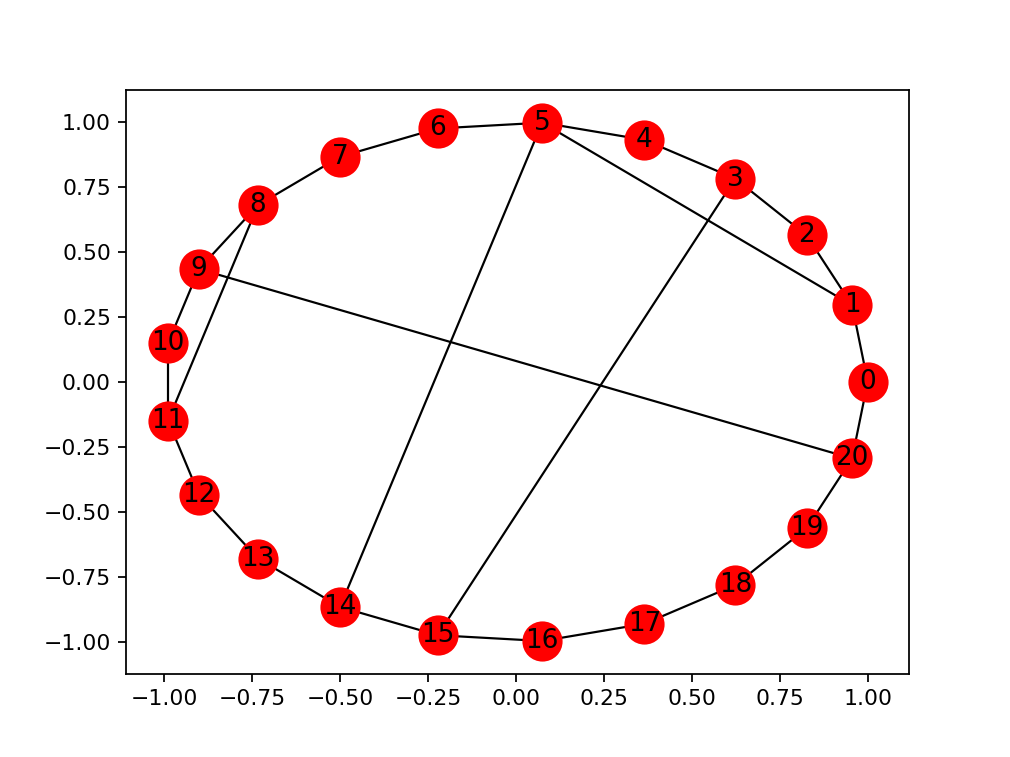

In [2]:
%matplotlib notebook

#G = nx.erdos_renyi_graph(20,0.3)
G = nx.newman_watts_strogatz_graph(21, 3, 0.2)
pos = nx.spring_layout(G)
pos = {i: np.array([np.cos(2*np.pi*i/len(G)),np.sin(2*np.pi*i/len(G))]) for i in range(len(G))}

chi = np.array([ 1.j for i in range(len(G.edges))])

plt.figure()
nx.draw_networkx(G,pos=pos)

In [3]:
naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1')

naq_u1.update_laplacian()
        
L = naq_u1.L0.todense()

<IPython.core.display.Javascript object>


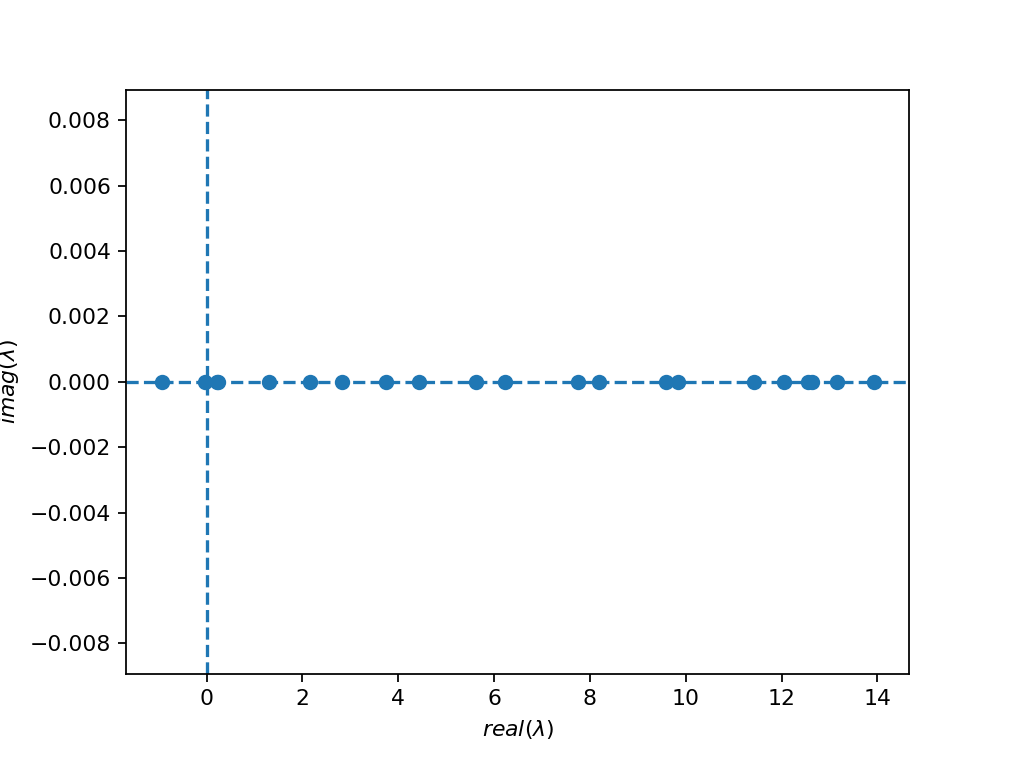

In [4]:
w, v = np.linalg.eig(L)

plt.figure()
plt.scatter(np.real(w), np.imag(w))
plt.xlabel(r'$real(\lambda)$')
plt.ylabel(r'$imag(\lambda)$')

plt.axvline(0,ls='--')
plt.axhline(0,ls='--')

In [5]:
naq_u1.test_laplacian() #return the singular value/condition number/ smallest eigenvalue

0.037978116

In [6]:
Ks = np.linspace(1.5,4.5,20)
k_mu = naq_u1.compute_spectrum_U1( Ks,7)

In [7]:
K = np.linspace(1,5,500)
s = np.zeros(len(K))

for i,k in enumerate(K):
    naq_u1.set_chi(k*chi)
    s[i] = naq_u1.test_laplacian()


<IPython.core.display.Javascript object>


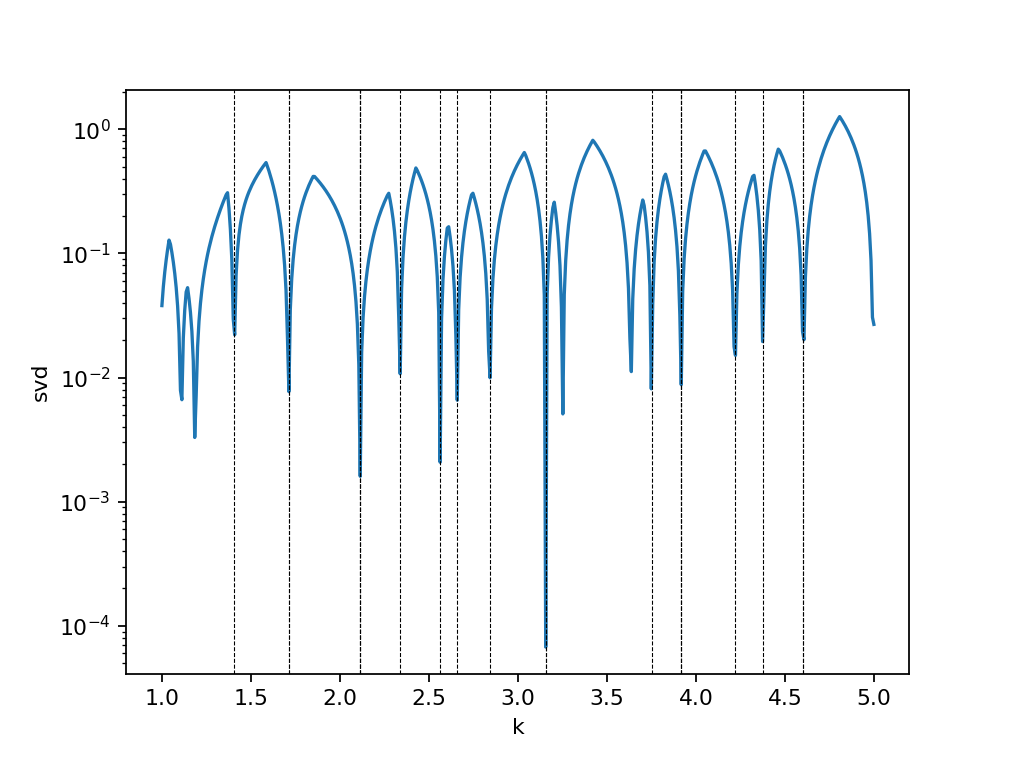

Text(0,0.5,'svd')

In [8]:
plt.figure()
plt.semilogy(K,np.abs(s))
for k in k_mu:
    plt.axvline(k,ls = '--',c='k' ,lw=0.5)
plt.xlabel('k')
plt.ylabel(naq_u1.cond_type)

In [9]:
naq_u1.set_chi(k_mu[1]*naq_u1.chi0)
naq_u1.update_laplacian()
phi = naq_u1.compute_solution()

<IPython.core.display.Javascript object>


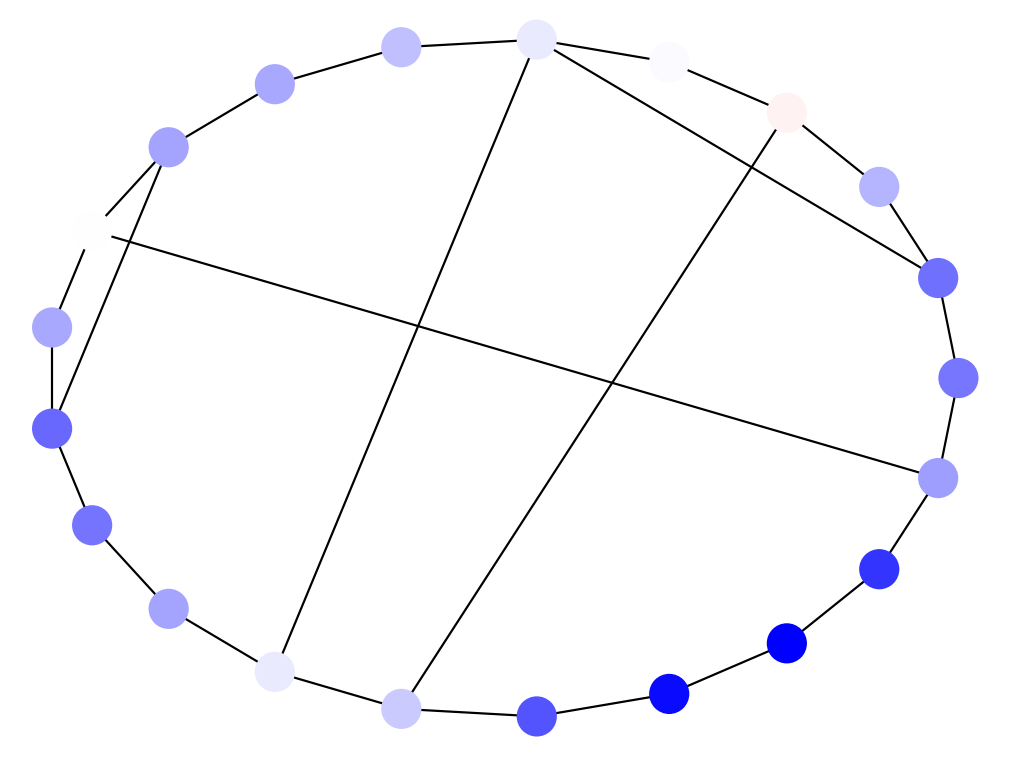

In [10]:
plt.figure()
nx.draw(G,pos=pos, node_color = np.real(phi),cmap='bwr',vmin=-np.max(abs(np.real(phi))),vmax=np.max(abs(np.real(phi))))
